<a href="https://colab.research.google.com/github/PrasantIITM/ma22c033_2023_PL/blob/main/Assignment%208/The_Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [22]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)
print(a)
print("svd")
print(svd(a))

[[0.877+0.748j 0.669+0.621j 0.424+0.408j 0.239+0.655j 0.082+0.223j]
 [0.337+0.351j 0.952+0.154j 0.552+0.114j 0.827+0.476j 0.83 +0.937j]
 [0.572+0.702j 0.463+0.887j 0.713+0.85j  0.784+0.508j 0.793+0.914j]
 [0.495+0.957j 0.595+0.837j 0.697+0.334j 0.15 +0.08j  0.07 +0.07j ]]
svd
(array([[ 0.444+0.j   ,  0.44 +0.j   , -0.552+0.j   ,  0.551+0.j   ],
       [ 0.471-0.175j, -0.442-0.312j,  0.172-0.599j,  0.146-0.211j],
       [ 0.622+0.015j, -0.36 +0.079j, -0.078+0.475j, -0.292+0.401j],
       [ 0.404+0.015j,  0.433+0.436j,  0.254-0.099j, -0.416-0.46j ]]), array([3.612, 1.332, 0.601, 0.27 ]), array([[ 0.296+0.377j,  0.352+0.384j,  0.324+0.269j,  0.269+0.275j,
         0.222+0.351j],
       [ 0.458+0.135j,  0.263+0.187j,  0.124-0.165j, -0.414+0.045j,
        -0.582-0.338j],
       [-0.528-0.307j,  0.258+0.395j,  0.473-0.209j, -0.108-0.268j,
        -0.135+0.186j],
       [-0.274-0.262j,  0.231+0.172j, -0.079+0.021j,  0.1  +0.661j,
         0.157-0.544j],
       [ 0.039+0.155j, -0.563-0.047j,  

In [23]:
u @ u.T.conjugate()   # u is unitary. Its columns are left singulaectr vors

array([[ 1.+0.j, -0.+0.j, -0.-0.j, -0.+0.j],
       [-0.-0.j,  1.+0.j,  0.-0.j, -0.+0.j],
       [-0.+0.j,  0.+0.j,  1.+0.j, -0.-0.j],
       [-0.-0.j, -0.-0.j, -0.+0.j,  1.+0.j]])

In [24]:
vh @ vh.T.conjugate() # Rows of vh are right singular vectors

array([[ 1.+0.j, -0.+0.j,  0.-0.j,  0.-0.j, -0.-0.j],
       [-0.-0.j,  1.+0.j, -0.+0.j,  0.+0.j, -0.-0.j],
       [ 0.+0.j, -0.-0.j,  1.+0.j,  0.-0.j, -0.-0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j,  0.-0.j,  1.+0.j]])

In [25]:
s     # Only the diagonal entries of Sigma are returned in s

array([3.612, 1.332, 0.601, 0.27 ])

**The algebra of SVD**

In [26]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)
print(a)

[[0.084 0.015 0.642 0.179 0.813]
 [0.936 0.12  0.696 0.585 0.377]
 [0.264 0.169 0.877 0.634 0.647]
 [0.513 0.432 0.979 0.364 0.227]]


In [27]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[0.156, 0.063, 0.264, 0.151, 0.162],
       [0.292, 0.118, 0.493, 0.282, 0.303],
       [0.073, 0.03 , 0.124, 0.071, 0.076],
       [0.225, 0.091, 0.381, 0.218, 0.234]])

In [28]:
np.outer(u[0, :], vh[0, :])

array([[0.156, 0.063, 0.264, 0.151, 0.162],
       [0.292, 0.118, 0.493, 0.282, 0.303],
       [0.073, 0.03 , 0.124, 0.071, 0.076],
       [0.225, 0.091, 0.381, 0.218, 0.234]])

In [29]:
ar = np.zeros_like(a)
for i in range(4):
    ar += np.outer(u[:, i], s[i] * vh[i, :])

In [30]:
a - ar   # a and ar are identical

array([[ 0., -0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.],
       [-0.,  0.,  0., -0.,  0.]])

**The geometry of SVD**

In [31]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

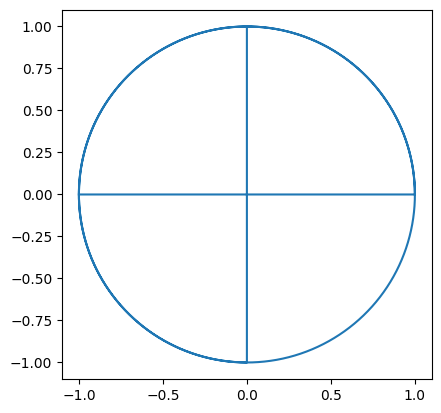

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def show(c):
    plt.plot(c[0, :], c[1, :])
    plt.axis('image');

# plot the unit circle and axis segments:

t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),
              np.concatenate([z, np.sin(t), l])])
show(c)


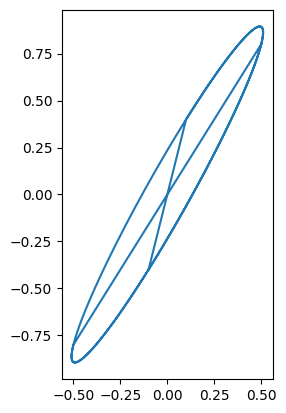

In [33]:
show(a @ c)

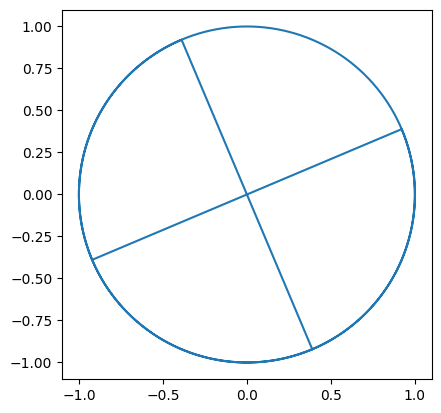

In [34]:
show(vh @ c)

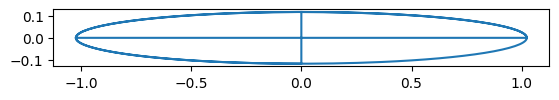

In [35]:
show(np.diag(s) @ c)

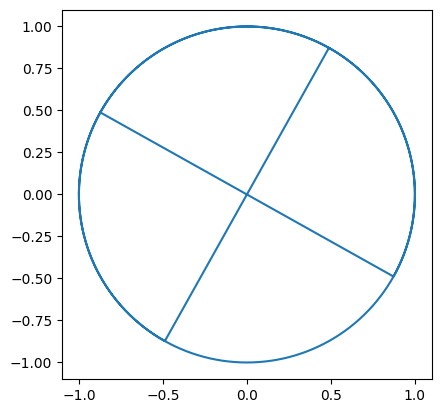

In [36]:
show(u @ c)

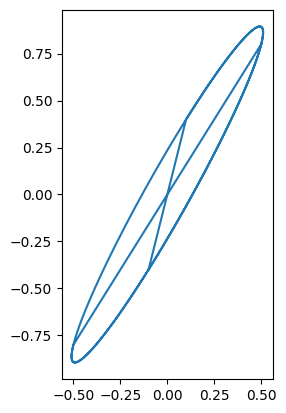

In [37]:
show(u @ np.diag(s) @ vh @ c)

**Low rank approximation**

In [38]:
cats = plt.imread('/content/cat-png.png')
cats.shape

(758, 1040, 4)

In [39]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

57.244976

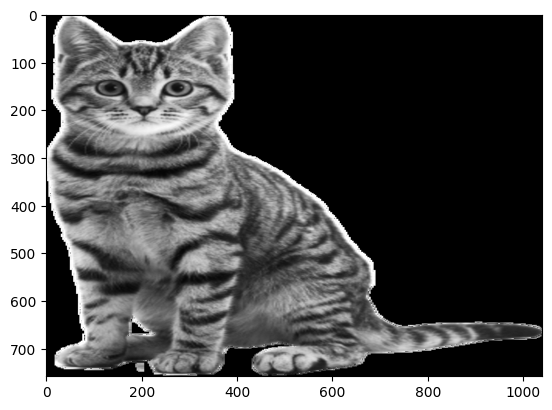

In [40]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

In [41]:
u, s, vh = svd(c)

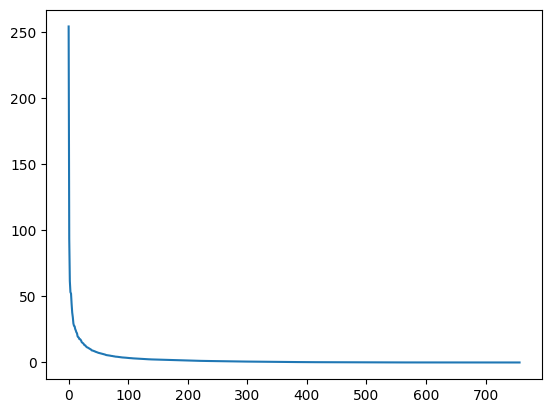

In [42]:
plt.plot(s);

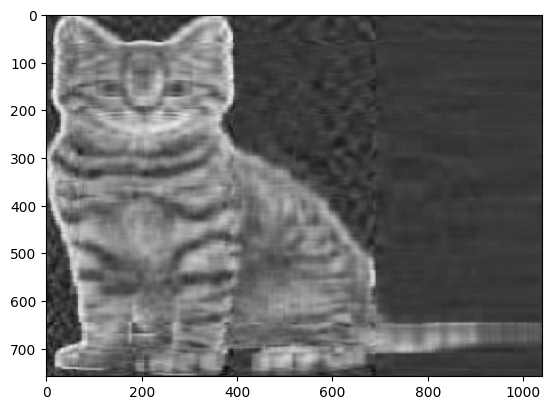

In [43]:
# Rank 20 approximation of the cats:
l = 20;   cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

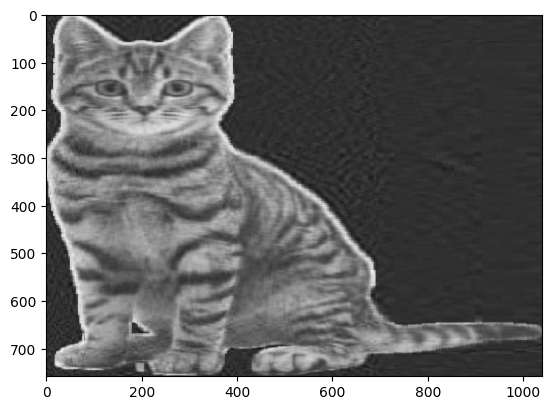

In [44]:
# Rank 50 approximation of the cats:
l = 50;   cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [45]:
relative_error = 1.e-1

In [46]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

79

In [47]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [48]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09952117

In [49]:
u.shape[0] * l + l + l * vh.shape[0]

142121

In [50]:
c.shape[0] * c.shape[1]

788320